In [101]:
# Clustering algorithms
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.cluster.vq import vq, kmeans, whiten

# Data Manipulation
import matplotlib.pyplot as plt, numpy as np

# Word pre-proccesing for NLP
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Visualization
import seaborn as sns, pandas as pd

# Performance check
import timeit

In [102]:
# Generate Random Data
np.random.seed = 10
x_coord = whiten(np.random.rand(50) * 10)
y_coord = whiten(np.random.rand(50) * 10)

# Build DataFrame
df = pd.DataFrame({'x': x_coord, 'y': y_coord})
df.head()

,x,y
0,2.795064,2.813660
1,0.704539,3.181765
2,1.283604,1.623100
3,1.796262,1.254860
4,2.305462,2.190556


In [103]:
# Calculate linkage matrix with 'ward' method
distance_matrix = linkage(df, method='ward')

# Add clustered column with new label
df['hierarchy'] = fcluster(distance_matrix, 3, criterion='maxclust')

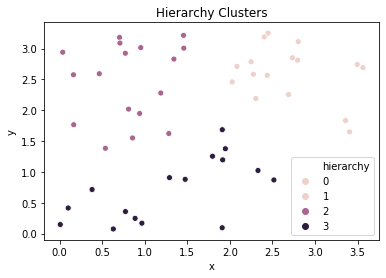

In [104]:
# Visualize Hierarchy Clusters
sns.scatterplot(x='x', y='y', hue='hierarchy', data=df)
plt.title('Hierarchy Clusters')
plt.show()

In [105]:
# Calculate Centroids with kmeans and add labels to df
centroids, distortion = kmeans(df, 3)
df['kmeans'], df['distortion'] = vq(df, centroids)

# Mean centroids in k-means
df[['x', 'y', 'kmeans']].groupby('kmeans').mean()

,x,y
kmeans,,
0,2.723426,2.513708
1,1.302847,0.713641
2,0.814828,2.467571


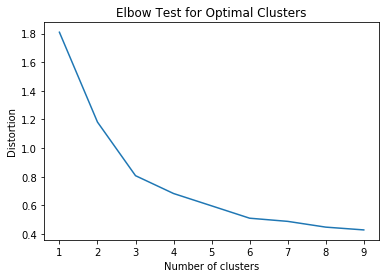

In [106]:
# Elbow method to determine optimal number of clusters
num_clusts = range(1, 10)
distortions = [kmeans(df, i)[1] for i in num_clusts]
sns.lineplot(num_clusts, distortions)
plt.title('Elbow Test for Optimal Clusters')
plt.ylabel('Distortion')
plt.xlabel('Number of clusters')
plt.show()

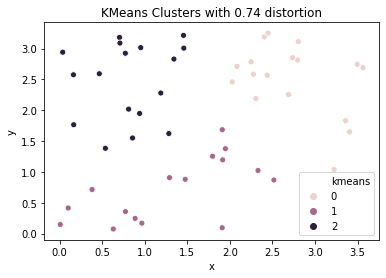

In [107]:
# Visualize Kmeans Clusters
sns.scatterplot(x='x', y='y', hue='kmeans', data=df)
plt.title(f'KMeans Clusters with {round(distortion, 2)} distortion')
plt.show()


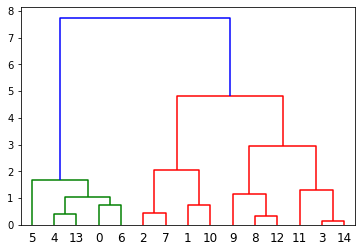

In [108]:
# Dendrograms are used visualizations to predict optimal number of clusters
distance_matrix = linkage(df.head(15), method='ward', metric='euclidean')
dn = dendrogram(distance_matrix)
plt.show()

In [127]:
# Import NLP preproccesing library nltk and download resource
import re
import nltk

# Define a function to remove noise from NLP dataset
def remove_noise(text):
    """ Remove noise by lowering words and deleting punctuation """
    tokens = nltk.tokenize.word_tokenize(text)
    cleaned_tokens = []

    for token in tokens:
        if len(token) > 1:
            token = re.sub('[^a-z0-9]+', '', token.lower())
            cleaned_tokens.append(token)

    return cleaned_tokens

In [128]:
# Test tokenizer function
print(remove_noise("The time I spend with you is as dull as a round rock"))


['the', 'time', 'spend', 'with', 'you', 'is', 'as', 'dull', 'as', 'round', 'rock']


In [139]:
# Import dataset
from datasets import nlp_documents as plots

# Instanciate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, min_df=0.1, max_features=50, tokenizer=remove_noise)

# Fit vectorizer with plots data to generate sparse matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

In [140]:
# Run K-Means on NLP data assuming 2 clusters
clusters = 2
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()


for i in range(clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, cluster_centers[i]))
    sorted_terms = sorted(terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['', 'him', 'an']
['her', 'she', 'him']
